In [1]:
import sys
sys.path.append('../')

In [31]:
import os
import numpy as np
import matplotlib.pyplot as plt

In [41]:
from LooselySymmetricNN import LooselySymmetricNN
from utils.Preprocessing import Preprocessing
from sklearn.model_selection import train_test_split

## Load data

In [11]:
mails_dir = "../datasets/SpamAssassin"
spam_dirs = [os.path.join(mails_dir, "spam"), os.path.join(mails_dir, "spam_2")]
ham_dirs = [os.path.join(mails_dir, "easy_ham"), os.path.join(mails_dir, "easy_ham_2")]

In [12]:
spam = []
ham = []
spam_labels = []
ham_labels = []

In [13]:
for ham_dir in ham_dirs:
    ham_dir_files = os.listdir(ham_dir)
    for file in ham_dir_files:
        with open(os.path.join(ham_dir, file), "r", encoding="latin-1") as f:
            mail = f.read()
            ham.append(mail)
            ham_labels.append(0)

            
for spam_dir in spam_dirs:
      spam_dir_files = os.listdir(spam_dir)
    for file in spam_dir_files:
        with open(os.path.join(spam_dir, file), "r", encoding="latin-1") as f:
            mail = f.read()
            spam.append(mail)
            spam_labels.append(1)

In [16]:
X_train_spam, X_test_spam, y_train_spam, y_test_spam = train_test_split(
    spam, spam_labels, test_size=300)
X_train_ham, X_test_ham, y_train_ham, y_test_ham = train_test_split(
    ham, ham_labels, test_size=300)

In [19]:
X_test = np.concatenate((X_test_spam, X_test_ham))
y_test = np.concatenate((y_test_spam, y_test_ham))

## Training and evaluation

In [21]:
sizes = [50, 100, 200, 300]
spam_ratio = 0.31
ham_ratio = 0.69

In [44]:
results = {
    "accuracy_score": [],
    "f1_score": [],
    "precision_score": [],
    "recall_score": []
}

In [45]:
for size in sizes:
    print(size)
    
    spam_size = round(spam_ratio*size)
    ham_size = round(ham_ratio*size)
    
    X_spam, drop, y_spam, drop = train_test_split(
        X_train_spam, y_train_spam, train_size=spam_size)
    X_ham, drop, y_ham, drop = train_test_split(
        X_train_ham, y_train_ham, train_size=ham_size)
    
    X_train = np.concatenate((X_spam, X_ham))
    y_train = np.concatenate((y_spam, y_ham))
    
    pr = Preprocessing()
    X_train = (pr.fit(X_train, None)).toarray()
    X_test_2 = (pr.transform(X_test)).toarray()

    nn = LooselySymmetricNN(n_input=X_train.shape[1], n_hidden=10, enhancement=0.1, epochs=100, enhancement_type="save_node_unified")
    nn.fit(X_train, y_train)
    y = nn.predict(X_test_2)

    results["accuracy_score"].append(nn.accuracy_score(y_test, y) * 100)
    results["f1_score"].append(nn.f1_score(y_test, y) * 100)
    results["precision_score"].append(nn.precision_score(y_test, y) * 100)
    results["recall_score"].append(nn.recall_score(y_test, y) * 100)


50
100
200
300


## Graph

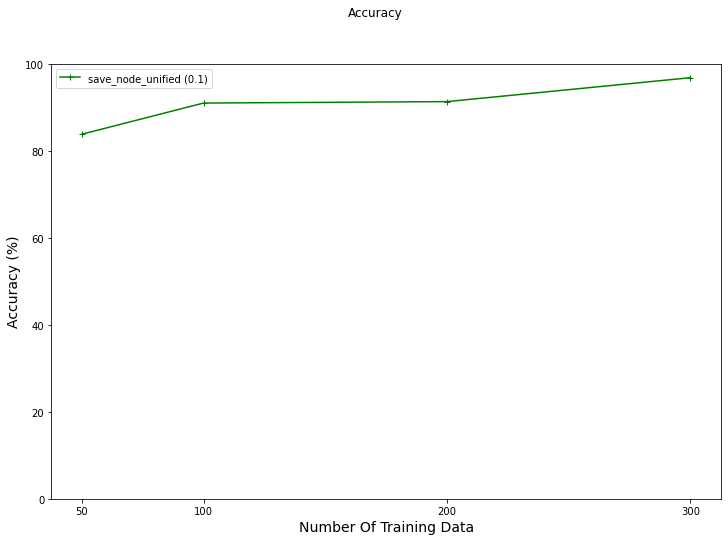

In [47]:
fig, axes = plt.subplots(1, sharex=True, figsize=(12, 8))
fig.suptitle('Accuracy')

axes.set_ylabel("Accuracy (%)", fontsize=14)
axes.set_xlabel("Number Of Training Data", fontsize=14)
plt.ylim([0, 100])
plt.xticks(sizes)

axes.plot(sizes, results["accuracy_score"], marker="+", color="g", label="save_node_unified (0.1)")

axes.legend()

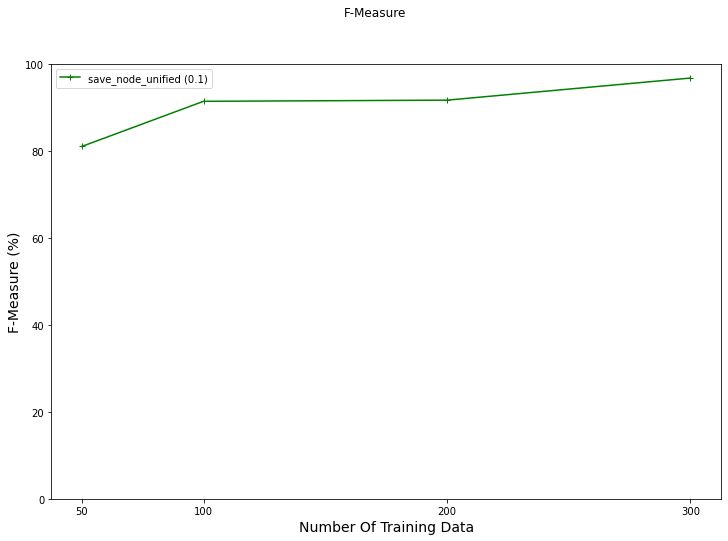

In [48]:
fig, axes = plt.subplots(1, sharex=True, figsize=(12, 8))
fig.suptitle('F-Measure')

axes.set_ylabel("F-Measure (%)", fontsize=14)
axes.set_xlabel("Number Of Training Data", fontsize=14)
plt.ylim([0, 100])
plt.xticks(sizes)

axes.plot(sizes, results["f1_score"], marker="+", color="g", label="save_node_unified (0.1)")

axes.legend()